In [3]:
import pandas as pd
import numpy as np

### Data processing

In [4]:
# Path to save data
path = "bd_data/"

Data for table **Especie**

In [5]:
dades1 = pd.read_csv("dades/records-2023-04-25.csv")
dades1.head()

,Species,Species Name,Scientific Name Authorship,Taxon Rank,Kingdom,Phylum,Class,Order,Family,Genus,Vernacular Name,Conservation,Invasive
0,9687165,Motacilla alba,"Linnaeus, 1758",species,Animalia,Chordata,Aves,Passeriformes,Motacillidae,Motacilla,White Wagtail,NaN,NaN
1,5231190,Passer domesticus,"(Linnaeus, 1758)",species,Animalia,Chordata,Aves,Passeriformes,Passeridae,Passer,House Sparrow,NaN,NaN
2,5229490,Pica pica,"(Linnaeus, 1758)",species,Animalia,Chordata,Aves,Passeriformes,Corvidae,Pica,Eurasian Magpie,NaN,NaN
3,2490719,Turdus merula,"Linnaeus, 1758",species,Animalia,Chordata,Aves,Passeriformes,Turdidae,Turdus,Eurasian Blackbird,NaN,NaN
4,2495455,Columba palumbus,"Linnaeus, 1758",species,Animalia,Chordata,Aves,Columbiformes,Columbidae,Columba,Common Wood-Pigeon,NaN,NaN


In [6]:
for i in dades1.columns:
    print(i)

Species
Species Name
Scientific Name Authorship
Taxon Rank
Kingdom
Phylum
Class
Order
Family
Genus
Vernacular Name
Conservation
Invasive


Common data to all rows

In [7]:
taxon_rank = dades1["Taxon Rank"].unique()[0]
kingdom =  dades1["Kingdom"].unique()[0]
phylum = dades1["Phylum"].unique()[0]
Class = dades1["Class"].unique()[0]

Filter data to use on DB's relation

In [8]:
especie = dades1.copy()

# Delete all unecessary data
especie = especie.drop(["Species","Scientific Name Authorship","Taxon Rank", "Kingdom", "Phylum","Class"], axis=1)

In colum conservation, change values for boolean

    1 --> if it has value different taht Nan, which means is an specie in conservation
    0 --> if value is NaN, which means the specie is not in conservation


In [9]:
especie["Conservation"] = especie["Conservation"].replace(np.nan, 0)
especie["Conservation"].values[especie["Conservation"].values != 0] = 1

In [10]:
especie["Conservation"].unique()

array([0, 1], dtype=object)

In colum invasive, change values for boolean

    1 --> if it has value different taht Nan, which means is an specie in invasive
    0 --> if value is NaN, which means the specie is not in invasive


In [11]:
especie["Invasive"] = especie["Invasive"].replace(np.nan, 0)
especie["Invasive"].values[especie["Invasive"].values != 0] = 1

In [12]:
especie["Invasive"].unique()

array([0, 1], dtype=object)

In [13]:
especie.head(10)

,Species Name,Order,Family,Genus,Vernacular Name,Conservation,Invasive
0,Motacilla alba,Passeriformes,Motacillidae,Motacilla,White Wagtail,0,0
1,Passer domesticus,Passeriformes,Passeridae,Passer,House Sparrow,0,0
2,Pica pica,Passeriformes,Corvidae,Pica,Eurasian Magpie,0,0
3,Turdus merula,Passeriformes,Turdidae,Turdus,Eurasian Blackbird,0,0
4,Columba palumbus,Columbiformes,Columbidae,Columba,Common Wood-Pigeon,0,0
5,Anas platyrhynchos,Anseriformes,Anatidae,Anas,Bunásuorsá,0,0
6,Motacilla cinerea,Passeriformes,Motacillidae,Motacilla,Gray Wagtail,0,0
7,Phoenicurus ochruros,Passeriformes,Muscicapidae,Phoenicurus,Black Redstart,0,0
8,Erithacus rubecula,Passeriformes,Muscicapidae,Erithacus,European Robin,1,0
9,Carduelis carduelis,Passeriformes,Fringillidae,Carduelis,European Goldfinch,0,0


In [14]:
np.shape(especie)

(244, 7)

Rename columns so they are the same as in our DB model

In [15]:
especie = especie.rename(columns={"Species Name": "nombre", "Order" : "orden", "Family" : "familia",
                        "Genus" : "genus", "Vernacular Name" : "nombre_comun", "Conservation" : "conservacion", 
                        "Invasive" : "invasivo"}, errors="raise")
especie.index.name = 'id_especie'

Save processed table as csv

In [16]:
especie.to_csv(path + "especie.csv")  

Data for table **Avistamiento**

In [17]:
dades2 = pd.read_csv("dades/records-2023-03-14/records-2023-03-14.csv")
dades2.head()

,data_resource_uid,dcterms:language,dcterms:license,dcterms:rightsHolder,access_rights,dcterms:bibliographicCitation,institutionID,collectionID,datasetID,institutionCode,...,taxonomicStatus,nomenclaturalStatus,taxonRemarks,species,verbatimIdentificationQualifier,provenance,recordID,dcterms:accessRights,verbatimContinent,verbatimBasisOfRecord
0,dr743,en,CC0,NaN,NaN,NaN,NaN,NaN,doi:10.15470/uykaay,AGBAR,...,NaN,NaN,NaN,Fulica atra,NaN,Published dataset,fffbadf9-b2e2-4eb5-9693-66cc9f1ae275,NaN,Europe,HumanObservation
1,dr743,en,CC0,NaN,NaN,NaN,NaN,NaN,doi:10.15470/uykaay,AGBAR,...,NaN,NaN,NaN,Buteo buteo,NaN,Published dataset,fff64d93-c37e-4a41-82fa-741ee0890278,NaN,Europe,HumanObservation
2,dr743,en,CC0,NaN,NaN,NaN,NaN,NaN,doi:10.15470/uykaay,SUEZ,...,NaN,NaN,NaN,Chroicocephalus ridibundus,NaN,Published dataset,fff08d30-3555-43f8-a43b-d4c1f9fe47dd,NaN,Europe,HumanObservation
3,dr743,en,CC0,NaN,NaN,NaN,NaN,NaN,doi:10.15470/uykaay,AGBAR,...,NaN,NaN,NaN,Streptopelia decaocto,NaN,Published dataset,ffe1f1c1-d7d3-4ba6-8e99-5d9377a6c0d7,NaN,Europe,HumanObservation
4,dr743,en,CC0,NaN,NaN,NaN,NaN,NaN,doi:10.15470/uykaay,SUEZ,...,NaN,NaN,NaN,Motacilla cinerea,NaN,Published dataset,ffe18f1c-7d64-41df-9dfe-b3c0630a34fd,NaN,Europe,HumanObservation


In [18]:
avistamiento = dades2.copy()

# Get only necessary data
avistamiento = avistamiento[['institutionCode','basisOfRecord','organism_quantity','sex',
                            'reproductiveCondition','behavior','occurrenceStatus', 'identificationID','eventDate',
                            'eventTime','year','month','day','habitat','locationID','country','countryCode','stateProvince',
                            'municipality','locality','verbatimLocality','decimalLatitude','decimalLongitude','geodeticDatum',
                            'verbatimLatitude','verbatimLongitude','verbatimCoordinateSystem','taxonConceptID','scientificName',
                            'scientificName.1','species','verbatimContinent']]

In [19]:
avistamiento.head().stateProvince

0    Illes Balears
1        Tarragona
2    Illes Balears
3        Barcelona
4         A Coruña
Name: stateProvince, dtype: object

Get the cliamte region for each sighting

In [20]:
# Latitud --> paralelo respecto ecuador, SUD --> disminuye NORTE --> augmenta
# Longitud --> paralelo meridiano Greenwich ESTE --> augmenta OESTE --> disminuye

climas = ['Oceanico', 'Continental', 'Mediterraneo', 'Montaña', 'Subtropical', 'Semidesertico']

def obtain_climate_region(latitud, longitud):
    # Islas Baleares
    if latitud >= 38.617812 and latitud <= 40.185923 and longitud >= 0.976299 and longitud <= 4.766569:
        return "Mediterraneo"
    # Costa catalana, valenciana y murciana
    elif latitud >= 38.784519 and latitud <= 42.507920 and longitud >= -1.334251 and longitud <= 3.950784:
        return "Mediterraneo"
    # Málaga, Andalucia y sud de Extremadura
    elif latitud >= 35.795098 and latitud <= 39.017897 and longitud >= -6.967191 and longitud <= -3.397742:
        # Sierra de las Nieves 
        if latitud >= 35.795098 and latitud <= 36.818604 and longitud >= -5.463332 and longitud <= -4.971509:
            return 'Montaña'
        # Parque Natural Montes de Málaga 
        elif latitud >= 36.771231 and latitud <= 36.869366 and longitud >= -4.625016 and longitud <= -4.240628:
            return 'Montaña'
        return "Mediterraneo"
    # Región central de la península
    elif latitud >= 42.456535 and latitud <= 37.507842 and longitud >= -5.980018 and longitud <= -2.839890:
        # Sierra de Francia/Gata
        if latitud >= 40.220643 and latitud <= 40.572925 and longitud >= -6.880498 and longitud <= -5.909284:
            return 'Montaña'
        # Sierra de Gredos/Tamajón
        elif latitud >= 40.380539 and latitud <= 41.249557 and longitud >= -5.044052 and longitud <= -3.175033:
            return 'Montaña'
        # Sierra de Tirón/Guadarrama
        elif latitud >= 41.907106 and latitud <= 42.301143 and longitud >= -3.386683 and longitud <= -2.312574:
            return 'Montaña'
        # Serrania de Cuenca
        elif latitud >= 41.907106 and latitud <= 42.301143 and longitud >= -3.386683 and longitud <= -2.312574:
            return 'Montaña'
        # Sierras de Cazorla, Segura y Las Villas 
        elif latitud >= 38.523793 and latitud <= 42.301143 and longitud >= -3.386683 and longitud <= -1.861799:
            return 'Montaña'
        # Riera del Ebro por Aragón
        elif latitud >= 39.649699 and latitud <= 40.728562 and longitud >= -1.457609 and longitud <= -1.462747:
            return 'Semidesertico'
        return "Continental"
    # Galicia
    elif latitud >= 41.788945 and latitud <= 43.691119 and longitud >= -9.565874 and longitud <= -6.128470:
        # Cordillera Cantabrica
        if latitud >= 42.131723 and latitud <= 42.859869 and longitud >= -7.342574 and longitud <= -6.214440:
            return 'Montaña'
        return "Oceanico"
    # Costa Mar Cantabrico
    elif latitud >= 42.621838 and latitud <= 43.754703 and longitud >= -6.128470 and longitud <= -1.812319:
        # Cordillera Cantabrica
        if latitud >= 42.877835 and latitud <= 43.118087 and longitud >= -6.585371 and longitud <= -4.626571:
            return 'Montaña'
        return "Oceanico" 
    # Pre Pirineos
    elif latitud >= 41.836362 and latitud <= 42.995785 and longitud >= -1.724987 and longitud <= 1.248383:
        return "Oceanico" 
    # Pirineos
    elif latitud >= 42.171698 and latitud <= 43.192100 and longitud >= -1.300549 and longitud <= 2.156471:
        return "Montaña" 
    # Costa murciana y Alicante
    elif latitud >= 36.223175 and latitud <= 38.916778 and longitud >= -2.486359 and longitud <= -1.069175:
        return "Semidesértico" 
    # Islas Canarias
    elif latitud >= 27.553322 and latitud <= 29.478362 and longitud >= -19.031080 and longitud <= -13.064945:
        # Teide
        if latitud >= 28.140816 and latitud <= 28.339219 and longitud >= -16.699055 and longitud <= -16.474196:
            return 'Montaña'
        return "Subtropical" 

In [21]:
avistamiento['clima'] = [ obtain_climate_region(x,y) for x,y in zip(avistamiento['decimalLatitude'], avistamiento['decimalLongitude'])]

In [22]:
avistamiento

,institutionCode,basisOfRecord,organism_quantity,sex,reproductiveCondition,behavior,occurrenceStatus,identificationID,eventDate,eventTime,...,geodeticDatum,verbatimLatitude,verbatimLongitude,verbatimCoordinateSystem,taxonConceptID,scientificName,scientificName.1,species,verbatimContinent,clima
0,AGBAR,HumanObservation,1,NaN,NaN,NaN,present,NaN,2019-06-17,11:06,...,EPSG:4326,40.002799,4.093255,EPSG:4326,2474377,Fulica atra,Fulica atra,Fulica atra,Europe,Mediterraneo
1,AGBAR,HumanObservation,1,NaN,NaN,NaN,present,NaN,2019-06-11,10:06,...,EPSG:4326,41.145293,1.344624,EPSG:4326,2480537,Buteo buteo,Buteo buteo,Buteo buteo,Europe,Mediterraneo
2,SUEZ,HumanObservation,9,NaN,NaN,NaN,present,NaN,2018-06-14,09:06,...,EPSG:4326,39.826501,4.263918,EPSG:4326,6065824,Chroicocephalus ridibundus,Chroicocephalus ridibundus,Chroicocephalus ridibundus,Europe,Mediterraneo
3,AGBAR,HumanObservation,4,NaN,NaN,NaN,present,NaN,2019-06-09,08:06,...,EPSG:4326,41.951990,2.273074,EPSG:4326,2495696,Streptopelia decaocto,Streptopelia decaocto,Streptopelia decaocto,Europe,Mediterraneo
4,SUEZ,HumanObservation,2,NaN,NaN,NaN,present,NaN,2019-06-09,16:06,...,EPSG:4326,42.870067,-8.597038,EPSG:4326,2490310,Motacilla cinerea,Motacilla cinerea,Motacilla cinerea,Europe,Oceanico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101912,AGBAR,HumanObservation,15,NaN,NaN,NaN,present,NaN,2019-03-04,08:03,...,EPSG:4326,41.145293,1.344624,EPSG:4326,9687165,Motacilla alba,Motacilla alba,Motacilla alba,Europe,Mediterraneo
101913,AGBAR,HumanObservation,12,NaN,NaN,NaN,present,NaN,2020-03-18,11:03,...,EPSG:4326,42.870000,-8.590000,EPSG:4326,9409796,Corvus corone,Corvus corone,Corvus corone,Europe,Oceanico
101914,AGBAR,HumanObservation,1,NaN,NaN,NaN,present,NaN,2020-03-06,12:03,...,EPSG:4326,42.870000,-8.590000,EPSG:4326,9797180,Ardea cinerea,Ardea cinerea,Ardea cinerea,Europe,Oceanico
101915,AGBAR,HumanObservation,1,NaN,NaN,NaN,present,NaN,2018-03-27,14:03,...,EPSG:4326,42.200861,2.492040,EPSG:4326,9705453,Parus major,Parus major,Parus major,Europe,Mediterraneo


### Exploració gràfica

Study the data to extract statistics

-  Number of sightings per region
-  Number of sightings per year in each region
-  Number of sightings per month in each year for each region

In [23]:
import matplotlib.pyplot as plt

# Función auxiliar para hacer los plots
def show_stats(title, data):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)

    ax.title.set_text(title)
    data.unstack().plot(kind='bar',legend=True,position=0,ax=ax)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.show()

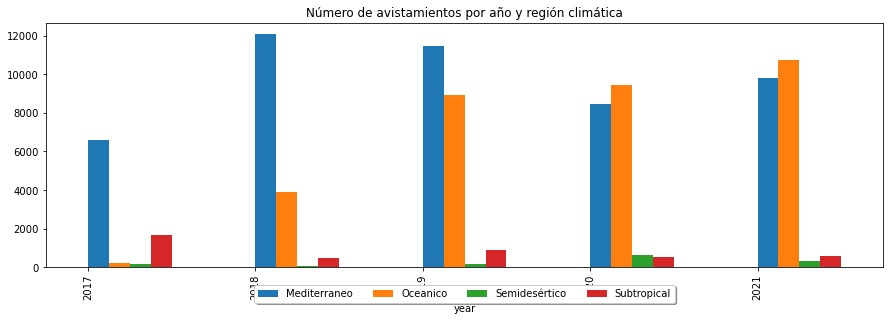

In [24]:
# Número de avistamientos por año y región climática
show_stats('Número de avistamientos por año y región climática', avistamiento.groupby(['year','clima']).size())

#### Avistamientos por año y provincia

Primero, estudiamos el número de avistamientos por año y provincia para sacar una hipótesis. Empezamos analizando el top 5 de avistamientos de aves en las diferentes provincias durante los años 2018, 2019, 2020 y 2021.

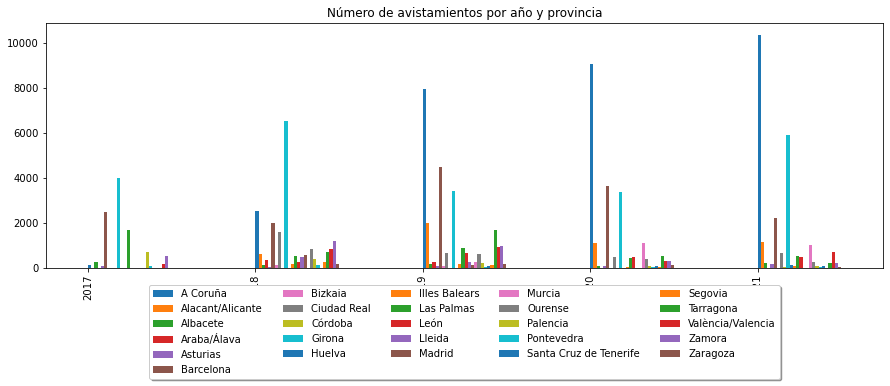

In [25]:
# Número de avistamientos por año y provincia
show_stats('Número de avistamientos por año y provincia', avistamiento.groupby(['year','stateProvince']).size())

In [26]:
# Top provincias con más avistamientos para cada año
top2018 = avistamiento[avistamiento['year'] == 2018].groupby(['stateProvince']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2019 = avistamiento[avistamiento['year'] == 2019].groupby(['stateProvince']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2020 = avistamiento[avistamiento['year'] == 2020].groupby(['stateProvince']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2021 = avistamiento[avistamiento['year'] == 2021].groupby(['stateProvince']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)

# Mostramos los top 5 de cada año
print('Top 5 provincias con más avistamientos en 2018')
print(top2018.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2018['counts'].sum()))
print('Avistaments totals de totes les províncies: ' + str(avistamiento[avistamiento['year'] == 2018].shape[0]))
print('\nTop 5 provincias con más avistamientos en 2019')
print(top2019.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2019['counts'].sum()))
print('Avistaments totals de totes les províncies: ' + str(avistamiento[avistamiento['year'] == 2019].shape[0]))
print('\nTop 5 provincias con más avistamientos en 2020')
print(top2020.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2020['counts'].sum()))
print('Avistaments totals de totes les províncies: ' + str(avistamiento[avistamiento['year'] == 2020].shape[0]))
print('\nTop 5 provincias con más avistamientos en 2021')
print(top2021.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2021['counts'].sum()))
print('Avistaments totals de totes les províncies: ' + str(avistamiento[avistamiento['year'] == 2021].shape[0]))

Top 5 provincias con más avistamientos en 2018
stateProvince  counts
       Girona    6530
     A Coruña    2496
    Barcelona    1985
  Ciudad Real    1595
       Zamora    1177
Avistaments totals del top 5: 13783
Avistaments totals de totes les províncies: 20142

Top 5 provincias con más avistamientos en 2019
   stateProvince  counts
        A Coruña    7934
       Barcelona    4448
          Girona    3422
Alacant/Alicante    1993
       Tarragona    1649
Avistaments totals del top 5: 19446
Avistaments totals de totes les províncies: 25896

Top 5 provincias con más avistamientos en 2020
   stateProvince  counts
        A Coruña    9035
       Barcelona    3619
          Girona    3377
Alacant/Alicante    1109
          Murcia    1080
Avistaments totals del top 5: 18220
Avistaments totals de totes les províncies: 21625

Top 5 provincias con más avistamientos en 2021
   stateProvince  counts
        A Coruña   10353
          Girona    5883
       Barcelona    2183
Alacant/Alicante   

De los resultados extraemos las conclusiones:

- A Coruña es la provincia que ha tenido consistentemente la mayor cantidad de avistamientos de aves en los últimos cuatro años. Su número de avistamientos ha aumentado de manera significativa, pasando de 2,496 en 2018 a 10,353 en 2021.
- Durante el año 2020 hubo una disminución en el número de avistamientos en comparación con 2019. Esta disminución podría estar relacionada con las restricciones de movilidad y el confinamiento impuestos debido a la pandemia. Las medidas de cuarentena y distanciamiento social podrían haber limitado la capacidad de las personas para realizar actividades al aire libre, incluido el avistamiento de aves.
- En general, ha habido un aumento en el número total de avistamientos a lo largo de los años.

#### Avistamientos mensuales por año y provincia

Pasamos entonces a analizar más en detalle los avistamientos, visualizando el total por mes y año en las diferentes provincias.

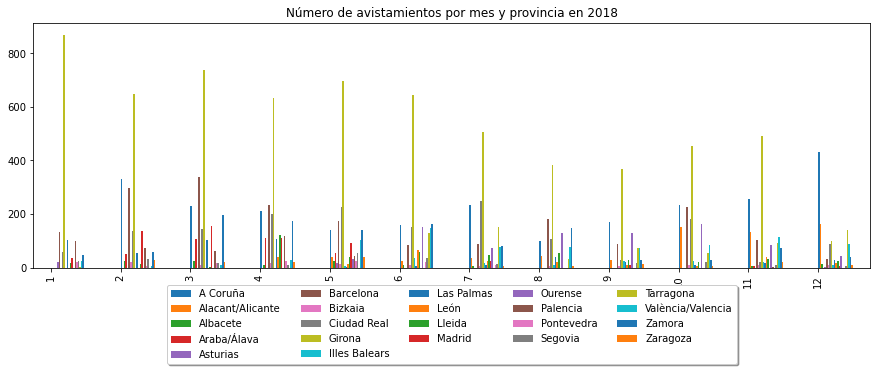

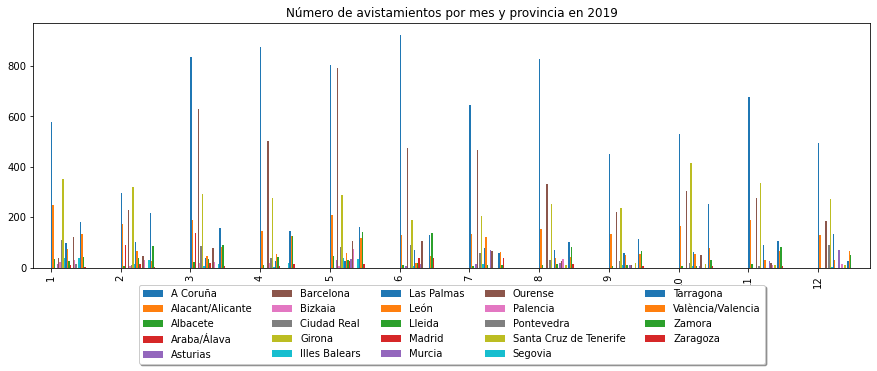

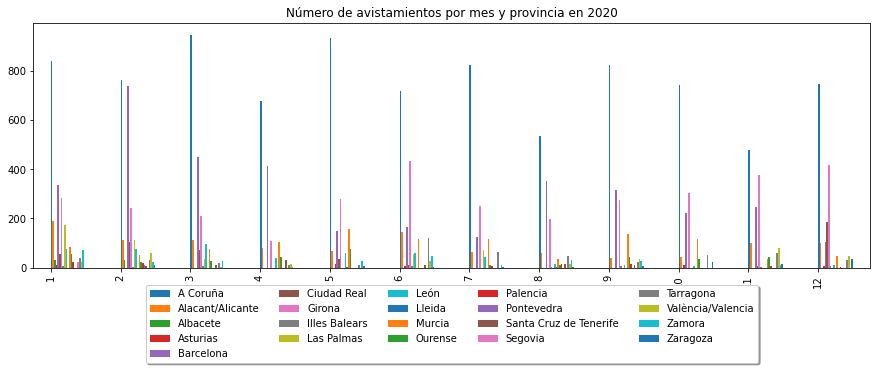

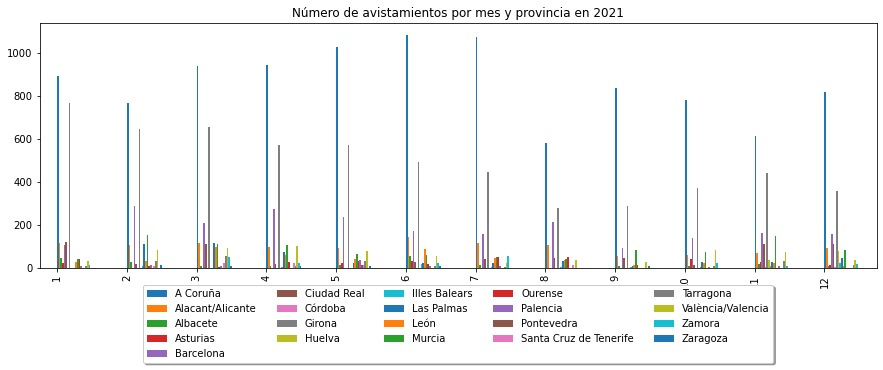

In [31]:
# Número de avistamientos por cada mes de cada año y provincia
avistamiento2018 = avistamiento[avistamiento['year'] == 2018].groupby(['month','stateProvince']).size()
avistamiento2019 = avistamiento[avistamiento['year'] == 2019].groupby(['month','stateProvince']).size()
avistamiento2020 = avistamiento[avistamiento['year'] == 2020].groupby(['month','stateProvince']).size()
avistamiento2021 = avistamiento[avistamiento['year'] == 2021].groupby(['month','stateProvince']).size()

# Gráficos de barras
show_stats('Número de avistamientos por mes y provincia en 2018', avistamiento2018)
show_stats('Número de avistamientos por mes y provincia en 2019', avistamiento2019)
show_stats('Número de avistamientos por mes y provincia en 2020', avistamiento2020)
show_stats('Número de avistamientos por mes y provincia en 2021', avistamiento2021)



In [28]:
# Top meses con más avistamientos para cada año
top2018 = avistamiento[avistamiento['year'] == 2018].groupby(['month']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2019 = avistamiento[avistamiento['year'] == 2019].groupby(['month']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2020 = avistamiento[avistamiento['year'] == 2020].groupby(['month']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2021 = avistamiento[avistamiento['year'] == 2021].groupby(['month']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)

# Mostramos los top 5 de cada año
print('Top 5 meses con más avistamientos en 2018')
print(top2018.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2018['counts'].sum()))
print('\nTop 5 meses con más avistamientos en 2019')
print(top2019.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2019['counts'].sum()))
print('\nTop 5 meses con más avistamientos en 2020')
print(top2020.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2020['counts'].sum()))
print('\nTop 5 meses con más avistamientos en 2021')
print(top2021.to_string(index=False))
print('Avistaments totals del top 5: ' + str(top2021['counts'].sum()))

Top 5 meses con más avistamientos en 2018 y sus temperaturas medias
 month  counts
     4    2173
     3    2170
     5    1981
     2    1915
     6    1892
Avistaments totals del top 5: 10131

Top 5 meses con más avistamientos en 2019
 month  counts
     5    3118
     3    2799
     6    2442
     4    2419
     1    2211
Avistaments totals del top 5: 12989

Top 5 meses con más avistamientos en 2020
 month  counts
     2    2423
     1    2368
     3    2096
     6    1925
     5    1810
Avistaments totals del top 5: 10622

Top 5 meses con más avistamientos en 2021
 month  counts
     3    2579
     4    2337
     5    2298
     2    2295
     6    2286
Avistaments totals del top 5: 11795


Viendo los datos vemos que los meses de primavera y verano tienden a tener más avistamientos de aves en comparación con los meses de invierno. Este patrón puede estar relacionado con los cambios estacionales y climáticos que influyen en la disponibilidad de alimentos y en la reproducción de las aves.

También, se observa que los meses de primavera (marzo, abril y mayo) presentan siempre una alta cantidad de avistamientos de aves en todos los años. Esto lo podemos atribuir a la migración de aves hacia su lugar de reproducción después del invierno.

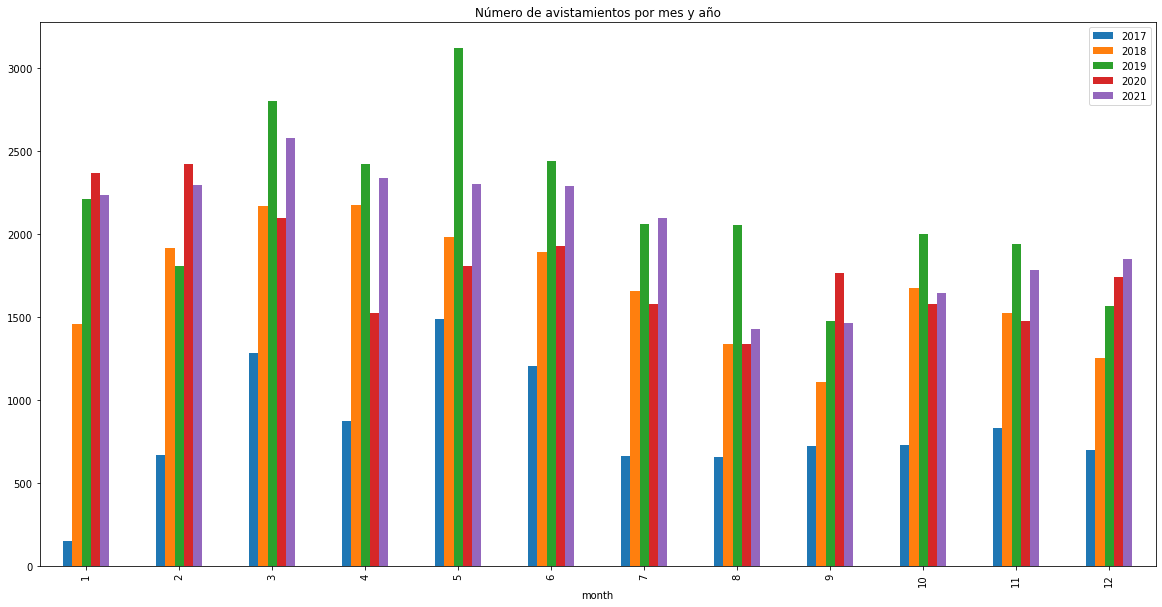

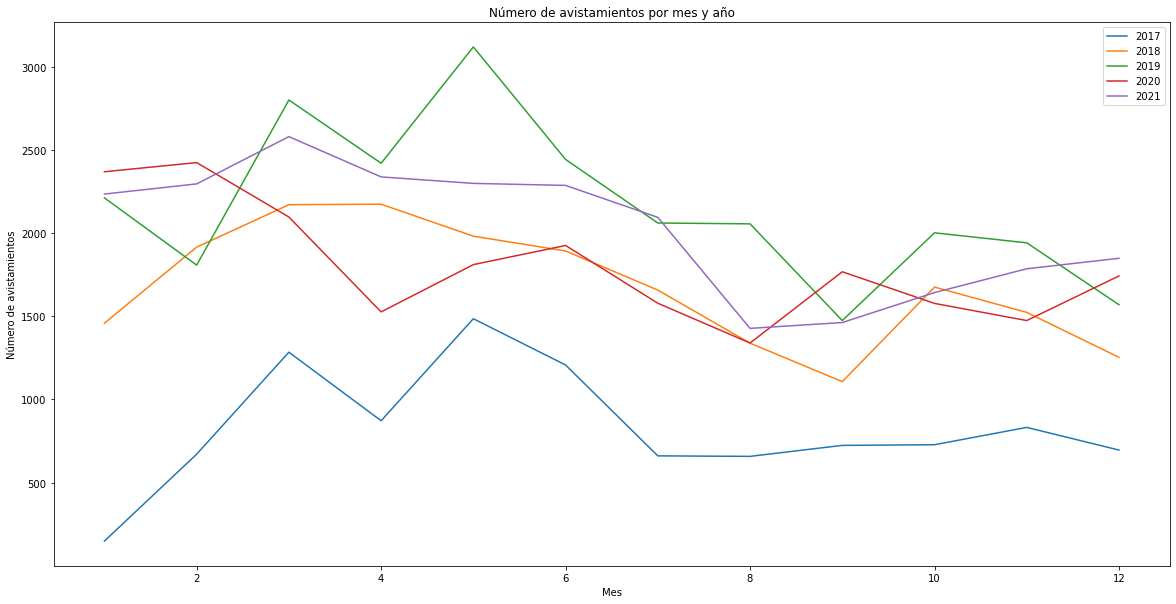

In [96]:
# Comparacion del numero de avistamientos totales en cada mes de cada año
avistamiento2017 = avistamiento[avistamiento['year'] == 2017].groupby(['month']).size()
avistamiento2018 = avistamiento[avistamiento['year'] == 2018].groupby(['month']).size()
avistamiento2019 = avistamiento[avistamiento['year'] == 2019].groupby(['month']).size()
avistamiento2020 = avistamiento[avistamiento['year'] == 2020].groupby(['month']).size()
avistamiento2021 = avistamiento[avistamiento['year'] == 2021].groupby(['month']).size()


avistamientos = pd.DataFrame({'2017': avistamiento2017, '2018': avistamiento2018, '2019': avistamiento2019, '2020': avistamiento2020, '2021': avistamiento2021})
avistamientos.plot.bar(figsize=(20,10), title='Número de avistamientos por mes y año')

plt.figure(figsize=(20,10))
plt.title('Número de avistamientos por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de avistamientos')
plt.plot(avistamientos.index, avistamientos['2017'], label='2017')
plt.plot(avistamientos.index, avistamientos['2018'], label='2018')
plt.plot(avistamientos.index, avistamientos['2019'], label='2019')
plt.plot(avistamientos.index, avistamientos['2020'], label='2020')
plt.plot(avistamientos.index, avistamientos['2021'], label='2021')
plt.legend()
plt.show()


#### Especies más avistadas por mes y año

Ahora veámos las especies más avistadas por mes y año. Nos enfocaremos en concretar si existe una relación entre el número de avistamientos de las especies y el clima, y si el COVID-19 ha sido realmente un factor que ha afectado a los avistamientos.

In [29]:
# Top especies avistadas por mes y año + su provincia y región climática
top2018 = avistamiento[avistamiento['year'] == 2018].groupby(['month','species','stateProvince','clima']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2019 = avistamiento[avistamiento['year'] == 2019].groupby(['month','species','stateProvince','clima']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2020 = avistamiento[avistamiento['year'] == 2020].groupby(['month','species','stateProvince','clima']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)
top2021 = avistamiento[avistamiento['year'] == 2021].groupby(['month','species','stateProvince','clima']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)

# Imprimimos el resultado
print('Top 5 especies más avistadas en los meses de 2018')
print(top2018.to_string(index=False))
print('\nTop 5 especies más avistadas en los meses de 2019')
print(top2019.to_string(index=False))
print('\nTop 5 especies más avistadas en los meses de 2020')
print(top2020.to_string(index=False))
print('\nTop 5 especies más avistadas en los meses de 2021')
print(top2021.to_string(index=False))

Top 5 especies más avistadas en los meses de 2018
 month           species stateProvince        clima  counts
     1    Motacilla alba        Girona Mediterraneo      81
     1 Passer domesticus        Girona Mediterraneo      67
     3    Motacilla alba        Girona Mediterraneo      64
     5    Motacilla alba        Girona Mediterraneo      64
     5 Passer domesticus        Girona Mediterraneo      63

Top 5 especies más avistadas en los meses de 2019
 month           species stateProvince        clima  counts
     5    Motacilla alba     Barcelona Mediterraneo      69
     5 Passer domesticus     Barcelona Mediterraneo      66
     3    Motacilla alba     Barcelona Mediterraneo      61
     5         Pica pica     Barcelona Mediterraneo      59
     3         Pica pica     Barcelona Mediterraneo      54

Top 5 especies más avistadas en los meses de 2020
 month                    species stateProvince        clima  counts
     2                  Pica pica     Barcelona Mediterrane

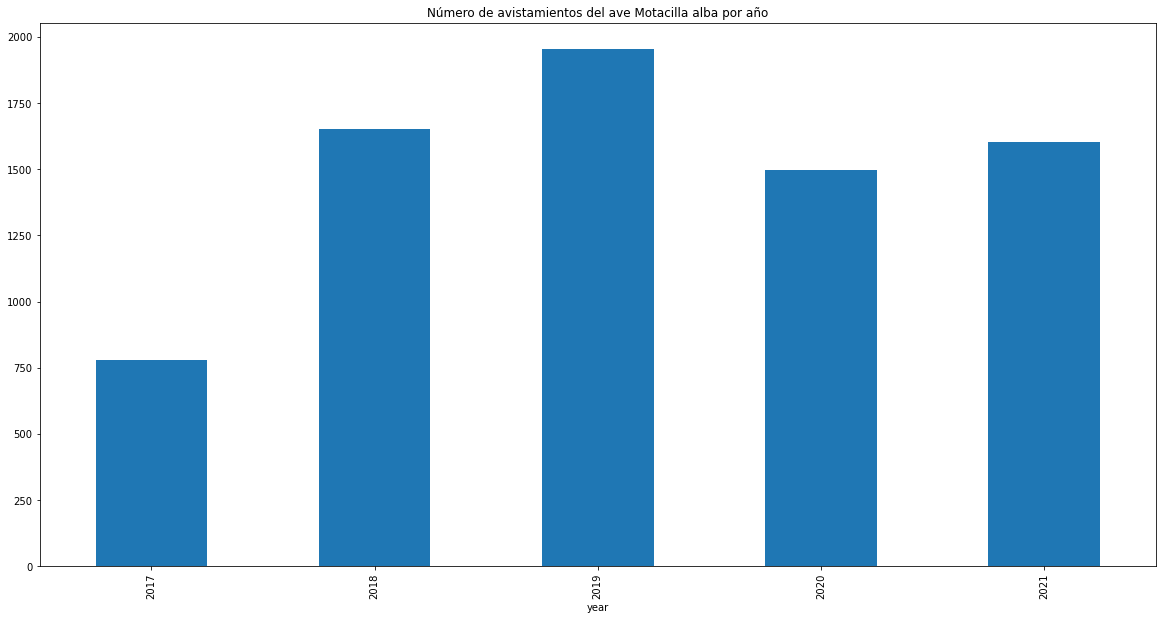

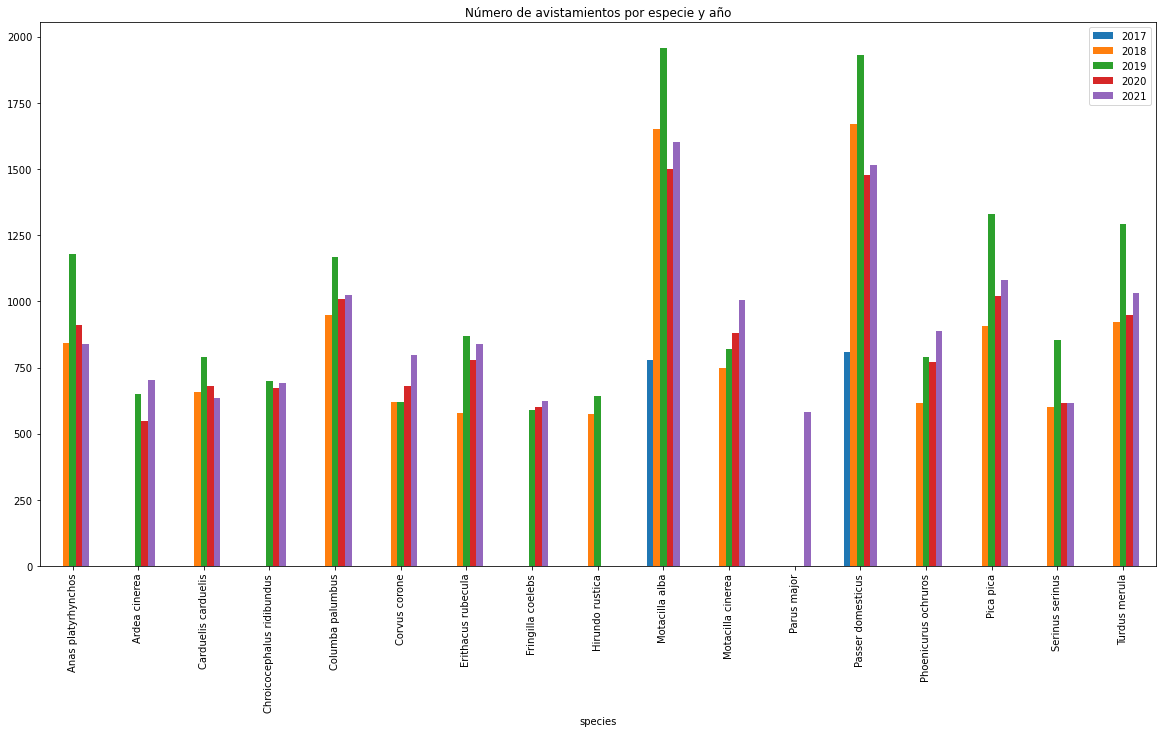

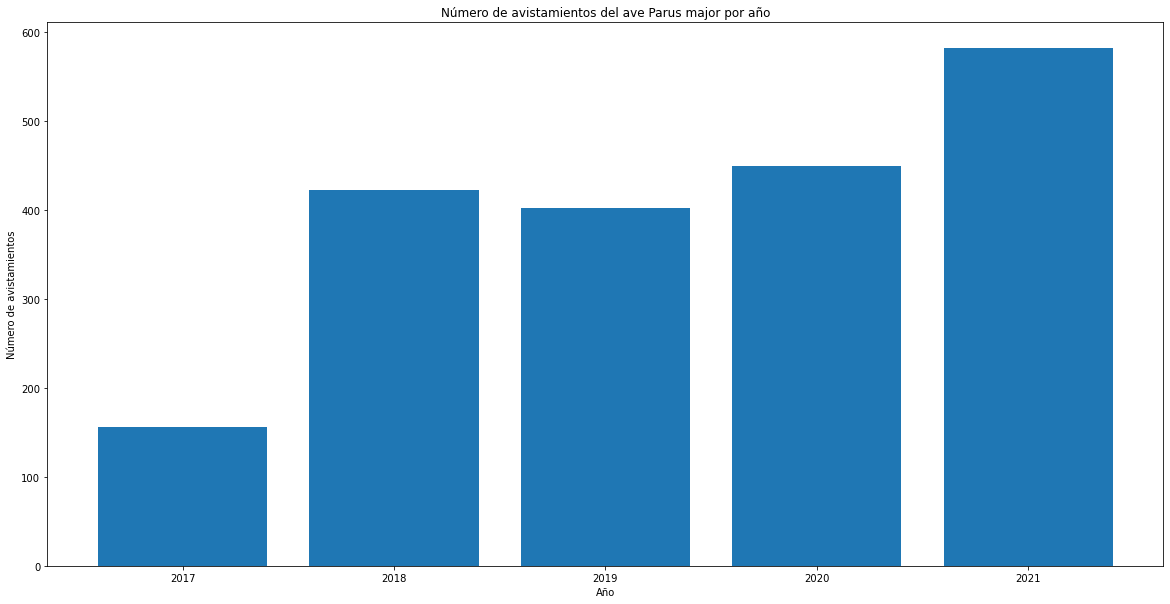

In [91]:
# Grafico que muestra el numero de avistamientos por año del ave 'Pica pica'
pica = avistamiento[avistamiento['species'] == 'Pica pica'].groupby(['year']).size()
pica.plot.bar(figsize=(20,10), title='Número de avistamientos del ave Pica pica por año')

# Grafico que muestra el numero de avistamientos por año del ave 'Motacilla alba'
motacilla = avistamiento[avistamiento['species'] == 'Motacilla alba'].groupby(['year']).size()
motacilla.plot.bar(figsize=(20,10), title='Número de avistamientos del ave Motacilla alba por año')

# Diferencia entre avistamientos de todas las especies en cada año
avistamiento2017 = avistamiento[avistamiento['year'] == 2017].groupby(['species']).size()
avistamiento2018 = avistamiento[avistamiento['year'] == 2018].groupby(['species']).size()
avistamiento2019 = avistamiento[avistamiento['year'] == 2019].groupby(['species']).size()
avistamiento2020 = avistamiento[avistamiento['year'] == 2020].groupby(['species']).size()
avistamiento2021 = avistamiento[avistamiento['year'] == 2021].groupby(['species']).size()

avistamiento2017 = avistamiento2017[avistamiento2017 > 500]
avistamiento2018 = avistamiento2018[avistamiento2018 > 500]
avistamiento2019 = avistamiento2019[avistamiento2019 > 500]
avistamiento2020 = avistamiento2020[avistamiento2020 > 500]
avistamiento2021 = avistamiento2021[avistamiento2021 > 500]

avistamientos = pd.DataFrame({'2017': avistamiento2017, '2018': avistamiento2018, '2019': avistamiento2019, '2020': avistamiento2020, '2021': avistamiento2021})
avistamientos.plot.bar(figsize=(20,10), title='Número de avistamientos por especie y año')

# Grafico que muestra el numero de avistamientos por año del ave 'Parus major'
parus = avistamiento[avistamiento['species'] == 'Parus major'].groupby(['year']).size()
plt.figure(figsize=(20,10))
plt.title('Número de avistamientos del ave Parus major por año')
plt.xlabel('Año')
plt.ylabel('Número de avistamientos')
plt.bar(parus.index, parus.values)
plt.show()

De los resultados no podemos extraer ninguna conclusión clara respecto el clima o el efecto del COVID-19 sin especular demasiado, que no es nuestro objetivo. Sin embargo, podemos destacar la siguiente información sobre las especies más observadas:

- Motacilla alba: Esta especie de ave fue una de las más avistadas en todos los años considerados. Se registraron avistamientos en los meses de enero, marzo, mayo y junio en diferentes provincias y climas.
- Passer domesticus: Esta especie también fue frecuentemente avistada, especialmente en los meses de enero y mayo. Su presencia se registró en varias provincias y climas.
- Pica pica: Esta especie fue avistada en los meses de mayo y marzo en Barcelona, en un clima mediterráneo. Sin embargo, su presencia no se observó en otros años o provincias.
- Chroicocephalus ridibundus: Esta especie fue registrada en febrero en Barcelona, en un clima mediterráneo. No se observó su presencia en otros años o provincias.
- Columba palumbus: Esta especie fue avistada en mayo en A Coruña, en un clima oceánico. No se observó su presencia en otros años o provincias.